In [8]:
# In this Python notebook we attempt to integrate a discrete dataset.
import numpy as np
import matplotlib.pyplot as plt

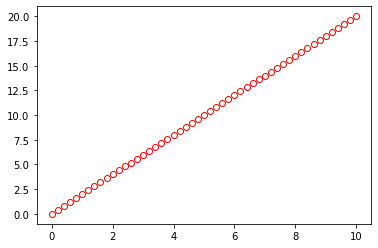

In [9]:
# First,
# let's generate a trivial (and noiseless) set of linear data.
x = np.arange(0, 10.2, 0.2)
y = 2*x
plt.plot(x, y, 'ro', fillstyle = 'none');

In [10]:
# One way to evaluate the integral is to use the MATLAB function 'trapz'
# (meaning use the trapezoid method).  Note that the integral finds the
# area under the function.  The area under our striaght line of slope 2 is
# (1/2)*10*20 = 100.
npInt = np.trapz(x,y)
print('The numerical integral from NumPy trapz() is:', npInt)

The numerical integral from NumPy trapz() is: 99.99999999999999


In [11]:
# We can also use a for loop to implement our own approximate integration
# scheme.  Imagine approximating the area under the curve as a series of
# rectangles.  Each has a height of h = (y(i+1) + y(i))/2 and a width dx =
# x(i+1) - x(i).  We simply add up the areas of all the rectangles.
int = 0;
for k in range(len(x) - 1):
    int = int + (y[k+1] + y[k])/2*(x[k+1] - x[k])
print('The numerical integral from our own For loop is:', int)

The numerical integral from our own For loop is: 100.0


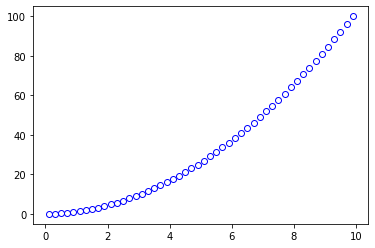

In [12]:
# The advantage of this second method is that, with a simple modification,
# we can plot the integral of the data.  We simply keep track of how the
# area changes as we increase x.  First make a list (intList) full of zeros uisng
# 'zeros', then replace the zeros in the list with the appropriate value of
# the area.  If there are N points in the list, then intList will have N-1
# points.  We expect the integral of a straight line to be a quadratic.
int = 0;
intList = []
x1 = []
for k in range(len(x) - 1):
    x1 = x1 + [x[k] + (x[k+1] - x[k])/2]
    int = int + (y[k+1] + y[k])/2*(x[k+1] - x[k])
    intList = intList + [int]
plt.plot(x1, intList, 'bo', fillstyle = 'none');

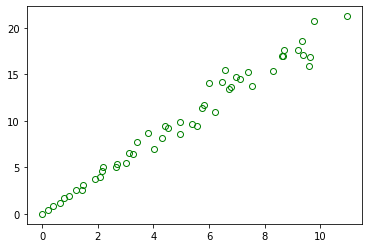

In [13]:
# Just for fun, let's add some noise to our data.  Let's suppose that the
# uncertainty in x is 10% and that dy = 2*dx.  'np.random.uniform()' 
# generates a random number uniformly distributed between 0 and 1.  
# You can confirm for yourself that a + (b - a)*np.random.uniform() generates 
# a random number between a and b.
xN = []
yN = []
for k in range(len(x)):
    xN = xN + [x[k] + 0.1*x[k]*(-1 + (1 - (-1))*np.random.uniform())]
    yN = yN + [2*x[k] + 2*0.1*x[k]*(-1 + (1 - (-1))*np.random.uniform())]
plt.plot(xN, yN, 'go', fillstyle = 'none');

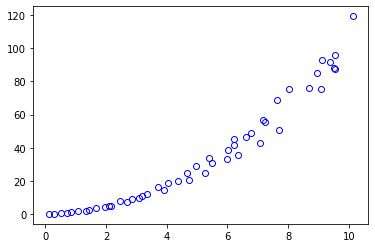

In [15]:
# Here's the numerical integration of the noisy data.
int = 0;
intList = []
x1 = []
for k in range(len(xN) - 1):
    x1 = x1 + [xN[k] + (xN[k+1] - xN[k])/2]
    int = int + (yN[k+1] + yN[k])/2*(xN[k+1] - xN[k])
    intList = intList + [int]
plt.plot(x1, intList, 'bo', fillstyle = 'none');

In [16]:
# The discrete integral is less senstive to noise than the discrete derivative. 